In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

In [85]:
#loading and cleaning the dataset
train_df = pd.read_csv("Train.csv", index_col=0)
train_df=train_df.drop("Name",axis=1)
train_df = pd.get_dummies(train_df, columns=["Location","Fuel_Type","Transmission","Owner_Type"], drop_first=True) #one-hot encoding - binary for each non numerical column
train_df.drop_duplicates(inplace=True)
train_df.dropna(inplace=True) #drops any rows where nan values present
print(train_df.head())

   Year  Kilometers_Driven     Mileage   Engine       Power  Seats  Price  \
0  2017              16500  23.84 kmpl  1199 CC      84 bhp    5.0   5.00   
1  2017              47357  18.49 kmpl  1493 CC     100 bhp    7.0   8.37   
2  2014              35000   15.0 kmpl  1598 CC  103.52 bhp    5.0   4.50   
3  2007             200000   17.2 kmpl  1396 CC    53.5 bhp    5.0   0.85   
4  2013              64000  21.02 kmpl  1248 CC   88.76 bhp    5.0   2.65   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0               False             False                False  ...   
1               False             False                False  ...   
2               False             False                False  ...   
3               False             False                False  ...   
4               False             False                False  ...   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0           False             False            Fals

In [86]:
#loading the test dataset
test_df = pd.read_csv("Test.csv", index_col=0)
test_df=test_df.drop("Name",axis=1)
test_df = pd.get_dummies(test_df, columns=["Location","Fuel_Type","Transmission","Owner_Type"], drop_first=True) #one-hot encoding - binary for each non numerical column
test_df.drop_duplicates(inplace=True)
test_df.dropna(inplace=True) #drops any rows where nan values present
print(test_df.head())

   Year  Kilometers_Driven     Mileage   Engine      Power  Seats  Price  \
0  2013              84175   23.4 kmpl  1248 CC     74 bhp    5.0   6.95   
1  2012              62282  16.95 kmpl  1197 CC   78.9 bhp    5.0   2.90   
2  2017              37460   18.6 kmpl  1197 CC  81.86 bhp    5.0   6.28   
3  2011             106976   13.5 kmpl  2400 CC    215 bhp    5.0  13.80   
4  2013              60000  20.36 kmpl  1197 CC   78.9 bhp    5.0   2.75   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0               False             False                False  ...   
1               False             False                False  ...   
2               False             False                False  ...   
3               False             False                False  ...   
4               False             False                False  ...   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0           False             False            False     

In [87]:
#feature engineering
train_df.Mileage = train_df.Mileage.str.replace(" kmpl", "").astype(float)
train_df.Engine = train_df.Engine.str.replace(" CC","").astype(int)
train_df.Power = train_df.Power.replace('null bhp', '0 bhp')
train_df.Power = train_df.Power.str.replace(" bhp","").astype(float)

x_train = train_df.drop("Price", axis=1)
x_train = x_train.apply(lambda col: col.astype(float) if col.dtype == 'bool' else col) #np.ptp cant work on bool type
x_train.to_numpy()
y_train = train_df.Price.to_numpy()

In [88]:
test_df.Mileage = test_df.Mileage.str.replace(" kmpl", "").astype(float)
test_df.Engine = test_df.Engine.str.replace(" CC","").astype(int)
test_df.Power = test_df.Power.replace('null bhp', '0 bhp')
test_df.Power = test_df.Power.str.replace(" bhp","").astype(float)

x_test = test_df.drop("Price", axis=1)
x_test = x_test.apply(lambda col: col.astype(float) if col.dtype == 'bool' else col) #np.ptp cant work on bool type
x_test.to_numpy()
y_test = test_df.Price.to_numpy()

In [89]:
print(f"\nx Shape: {x_train.shape}, X Type:{type(x_train)})")
print(x_train.head()) #printing top 5 rows of x_train
print(f"\ny Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train[:5])


x Shape: (3716, 22), X Type:<class 'pandas.core.frame.DataFrame'>)
   Year  Kilometers_Driven  Mileage  Engine   Power  Seats  \
0  2017              16500    23.84    1199   84.00    5.0   
1  2017              47357    18.49    1493  100.00    7.0   
2  2014              35000    15.00    1598  103.52    5.0   
3  2007             200000    17.20    1396   53.50    5.0   
4  2013              64000    21.02    1248   88.76    5.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                 0.0               0.0                  0.0             0.0   
1                 0.0               0.0                  0.0             0.0   
2                 0.0               0.0                  0.0             0.0   
3                 0.0               0.0                  0.0             0.0   
4                 0.0               0.0                  0.0             0.0   

   ...  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0 

In [90]:
#z score normalisation - feature scaling
x_mu = np.mean(x_train,axis=0)
x_sigma = np.std(x_train, axis=0)
x_sigma[x_sigma == 0] = 1  #replace zero standard deviations with 1 because all values identical(avoid division by 0)
x_norm = (x_train - x_mu)/x_sigma
print(f"X_mu = \n{x_mu}, \n\nX_sigma = \n{x_sigma}\n\n")
print(f"\nPeak to Peak range by column in Raw        X:\n{np.ptp(x_train,axis=0)}") #range of each column
print(f"\nPeak to Peak range by column in Normalized X:\n{np.ptp(x_norm,axis=0)}")

X_mu = 
Year                          2013.346340
Kilometers_Driven            58023.646663
Mileage                         18.095022
Engine                        1622.410657
Power                          111.556290
Seats                            5.277987
Location_Bangalore               0.061895
Location_Chennai                 0.081539
Location_Coimbatore              0.113563
Location_Delhi                   0.085038
Location_Hyderabad               0.125942
Location_Jaipur                  0.072390
Location_Kochi                   0.106835
Location_Kolkata                 0.088536
Location_Mumbai                  0.131055
Location_Pune                    0.096609
Fuel_Type_Electric               0.000000
Fuel_Type_Petrol                 0.464747
Transmission_Manual              0.712325
Owner_Type_Fourth & Above        0.001076
Owner_Type_Second                0.155813
Owner_Type_Third                 0.019107
dtype: float64, 

X_sigma = 
Year                             3.2387

In [91]:
#normalising the training dataset
x_mu_t = np.mean(x_test,axis=0)
x_sigma_t = np.std(x_test, axis=0)
x_sigma_t[x_sigma_t == 0] = 1
x_norm_t = ((x_test - x_mu_t)/x_sigma_t).to_numpy()

In [92]:
#function for computing cost
def cost(w,b,x,y):
  m = len(y)
  x = np.array(x)
  cost = 0.
  for i in range(m):
    f_wb_i = np.dot(x[i], w) + b
    error = f_wb_i - y[i]
    cost = (cost + error**2)/(2*m)
  return cost

In [93]:
#function for computing gradient for each iteration
def gradient(x,y,w,b):
  m,n = x.shape
  x = np.array(x)
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    error = np.dot(x[i],w)+b - y[i]
    for j in range(n):
      dj_dw[j] += error * x[i,j]
    dj_db += error
  dj_dw /= m
  dj_db /= m

  return dj_db,dj_dw

In [94]:
def grad_desc(x,y,w_in,b_in,costfn,gradfn,alpha,iters):
  cost_hist = [] #required for plotting later
  w = copy.deepcopy(w_in)  #avoid modifying w in fn
  b = b_in

  for i in range(iters):
    dj_db,dj_dw = gradient(x, y, w, b)
    w -= alpha * dj_dw
    b -= alpha * dj_db

    cost_hist.append(costfn(w,b,x,y))
    if i% math.ceil(iters / 10) == 0:
      print(f"Iteration {i:4d}: Cost {cost_hist[-1]}   ") #printing every 100 iterations
  return w, b, cost_hist

In [95]:
#initialising parameters
w_init = np.zeros(x_train.shape[1])
b_init = 0.
iterations = 1000

In [96]:
#gradient at initial weights
tmp_dj_db, tmp_dj_dw = gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -9.523514531754603
dj_dw at initial w,b: 
 [-1.91855203e+04 -4.79220436e+05 -1.57141733e+02 -1.98463423e+04
 -1.53260467e+03 -5.07407643e+01 -8.44712056e-01 -5.96329386e-01
 -1.72803014e+00 -7.32556512e-01 -1.24305705e+00 -3.85360603e-01
 -1.23716631e+00 -5.49585576e-01 -1.28269914e+00 -6.32618407e-01
  0.00000000e+00 -2.63860334e+00 -3.80020452e+00 -3.46340151e-03
 -1.18786868e+00 -8.23385361e-02]


In [97]:
#finding optimal alpha value(for efficiency)
alphas = [0.001, 0.003, 0.01, 0.03, 0.1,0.3,1]
alpha_iter = 200
best_alpha = None
lowest_cost = float('inf')
J_hist_alpha = []

for alpha in alphas:
    w_final, b_final, J_hist = grad_desc(x_norm, y_train, w_init, b_init, cost, gradient, alpha, alpha_iter)
    final_cost = J_hist[-1]
    J_hist_alpha.append(final_cost)
    print(f"Alpha: {alpha}, Final Cost: {final_cost}\n")
    if final_cost < lowest_cost:
        lowest_cost = final_cost
        best_alpha = alpha

print(f"Optimal Learning Rate: {best_alpha}")

Iteration    0: Cost 0.0007550002989126378   
Iteration   20: Cost 0.0009851790148480662   
Iteration   40: Cost 0.0012254893509375897   
Iteration   60: Cost 0.0014709991202951445   
Iteration   80: Cost 0.0017176424709887457   
Iteration  100: Cost 0.0019620983200856674   
Iteration  120: Cost 0.002201684302013037   
Iteration  140: Cost 0.0024342643456725407   
Iteration  160: Cost 0.0026581682176307804   
Iteration  180: Cost 0.002872121565682876   
Alpha: 0.001, Final Cost: 0.003065301791233991

Iteration    0: Cost 0.0007775313196809709   
Iteration   20: Cost 0.0014987869136476623   
Iteration   40: Cost 0.002231385318967012   
Iteration   60: Cost 0.0029014115838054146   
Iteration   80: Cost 0.003473614918981786   
Iteration  100: Cost 0.003936199565600736   
Iteration  120: Cost 0.004290956926919093   
Iteration  140: Cost 0.004546968157776768   
Iteration  160: Cost 0.004716674507914163   
Iteration  180: Cost 0.004813502185559713   
Alpha: 0.003, Final Cost: 0.0048498764837

In [98]:
w_final, b_final, J_hist = grad_desc(x_norm, y_train, w_init, b_init, cost, gradient, best_alpha, iterations)
print(f"\nb, w found by gradient descent: {b_final}, {w_final}\n")
m, n = x_norm_t.shape
for i in range(m):
    print(f"Prediction: {np.dot(x_norm_t[i], w_final) + b_final}, Target Value: {y_test[i]}")

Iteration    0: Cost 0.0078045177142779705   
Iteration  100: Cost 0.0016292607789468864   
Iteration  200: Cost 0.0016090518388725968   
Iteration  300: Cost 0.0016059065003221475   
Iteration  400: Cost 0.0016052371060947383   
Iteration  500: Cost 0.001605063554798411   
Iteration  600: Cost 0.001605014611946458   
Iteration  700: Cost 0.0016050003978747408   
Iteration  800: Cost 0.0016049962302875907   
Iteration  900: Cost 0.0016049950046634085   

b, w found by gradient descent: 9.523514531754582, [ 2.8669245  -1.11263458 -1.36932184  1.80213384  4.89572441 -1.24330601
  0.54179426  0.41630124  0.76107602 -0.16763624  0.87192439  0.3252798
  0.20052723 -0.29311215 -0.2253588   0.26870161  0.         -1.53197494
 -1.34912462 -0.0517273  -0.19529388  0.07741227]

Prediction: 5.303154198441087, Target Value: 6.95
Prediction: 3.457979353508712, Target Value: 2.9
Prediction: 6.112390395365212, Target Value: 6.28
Prediction: 24.383532996948105, Target Value: 13.8
Prediction: 0.3671196

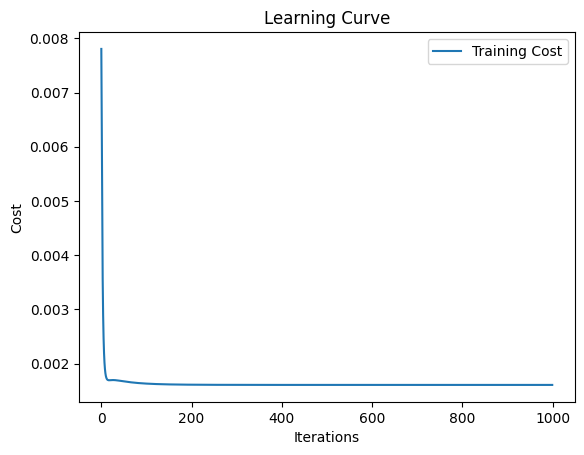

In [99]:
#Plotting learning curve
plt.plot(J_hist, label="Training Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Curve")
plt.legend()
plt.show()

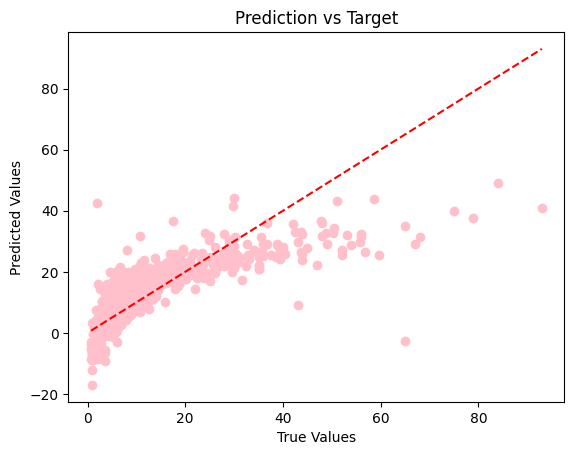

In [106]:
y_pred = np.dot(x_norm_t, w_final) + b_final
plt.scatter(y_test, y_pred, color='pink')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.title("Prediction vs Target")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

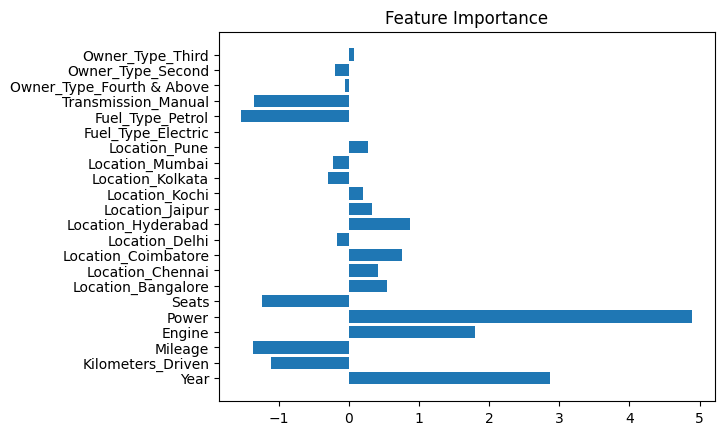

In [107]:
#plotting significance of all features in the prediction of price, using their corresponding weights
feature_names = x_train.columns
plt.barh(feature_names, w_final)
plt.title("Feature Importance")
plt.show()

In [108]:
def r_squared(y_actual, y_pred):
    sum_squares_tot = np.sum((y_actual-np.mean(y_actual))**2)
    sum_squares_resid = np.sum((y_actual-y_pred)**2)
    r2 = 1-(sum_squares_resid/sum_squares_tot)
    return r2

def mae(y_actual, y_pred):
    mae = np.mean(np.abs(y_actual - y_pred))
    return mae

def rms_error(y_actual, y_pred):
    mse = np.mean((y_actual-y_pred)**2)
    rmse = np.sqrt(mse)
    return rmse

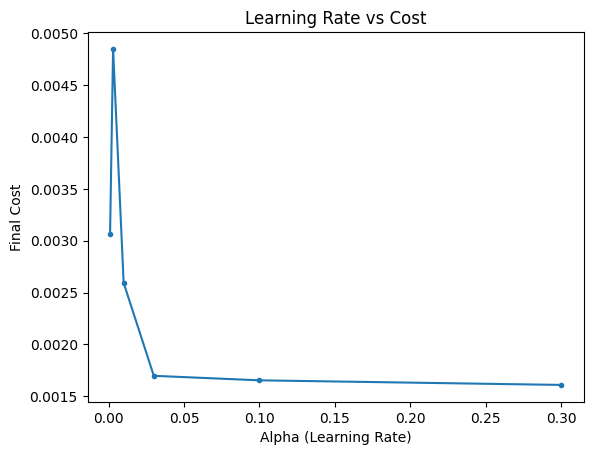

In [113]:
plt.plot(alphas[:-1], J_hist_alpha[:-1], marker='.') #not plotting alpha=1 because the value is too high(order 10^116)
plt.xlabel("Alpha (Learning Rate)")
plt.ylabel("Final Cost")
plt.title("Learning Rate vs Cost")
plt.show()

In [114]:
#computing errors
print(f"R Squared Error: {r_squared(y_test, y_pred)}")
print(f"Mean Absolute Error: {mae(y_test, y_pred)}")
print(f"Root Mean Squared Error: {rms_error(y_test, y_pred)}")

R Squared Error: 0.658059252658143
Mean Absolute Error: 3.9108719115872312
Root Mean Squared Error: 6.526030160586168
